<a href="https://colab.research.google.com/github/Prerana-Bijekar/ML/blob/main/Practical-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve

In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
import pandas as pd
df = pd.read_csv('Pima Indians Diabetes Database.csv')
df.head()

Saving Pima Indians Diabetes Database.csv to Pima Indians Diabetes Database.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Split data into features (X) and target (y)
X = df.drop('Outcome', axis=1) # Changed 'data' to 'df'
y = df['Outcome'] # Changed 'data' to 'df'

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 1. Bagging Model: Random Forest
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train_scaled, y_train)

# 2. Boosting Model: Gradient Boosting
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train_scaled, y_train)

# 3. AdaBoost Model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)

# 4. XGBoost Model
xgboost_model = XGBClassifier(n_estimators=100, random_state=42)
xgboost_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
bagging_pred = bagging_model.predict(X_test_scaled)
boosting_pred = boosting_model.predict(X_test_scaled)
adaboost_pred = adaboost_model.predict(X_test_scaled)
xgboost_pred = xgboost_model.predict(X_test_scaled)

In [5]:
# Define models and their names
models = {
    "Random Forest (Bagging)": bagging_model,
    "Gradient Boosting": boosting_model,
    "AdaBoost": adaboost_model,
    "XGBoost": xgboost_model
}

# Evaluate models
metrics = ["Accuracy", "ROC AUC", "Precision", "Recall", "F1-Score"]
results = {metric: [] for metric in metrics}

for name, model in models.items():
    pred = model.predict(X_test_scaled)
    prob = model.predict_proba(X_test_scaled)[:, 1]
    class_report = classification_report(y_test, pred, output_dict=True)

    results["Accuracy"].append(accuracy_score(y_test, pred))
    results["ROC AUC"].append(roc_auc_score(y_test, prob))
    results["Precision"].append(class_report['1']['precision'])
    results["Recall"].append(class_report['1']['recall'])
    results["F1-Score"].append(class_report['1']['f1-score'])

# Create and display the comparison table
comparison_table = pd.DataFrame(results, index=models.keys())
print("\nModel Performance Comparison:")
print(comparison_table)


Model Performance Comparison:
                         Accuracy   ROC AUC  Precision    Recall  F1-Score
Random Forest (Bagging)  0.720779  0.812489   0.607143  0.618182  0.612613
Gradient Boosting        0.746753  0.809550   0.637931  0.672727  0.654867
AdaBoost                 0.740260  0.805785   0.627119  0.672727  0.649123
XGBoost                  0.707792  0.766575   0.580645  0.654545  0.615385


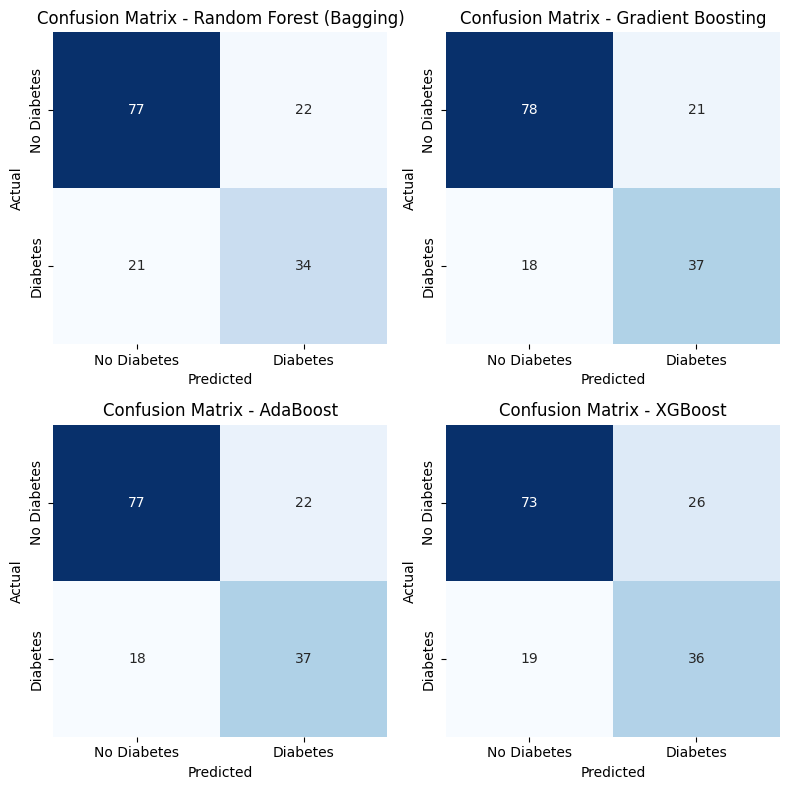

In [19]:
# Visualization 1: Confusion Matrix for all models
# Define models and predictions
models_preds = {
    "Random Forest (Bagging)": bagging_pred,
    "Gradient Boosting": boosting_pred,
    "AdaBoost": adaboost_pred,
    "XGBoost": xgboost_pred
}

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, (name, pred) in enumerate(models_preds.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

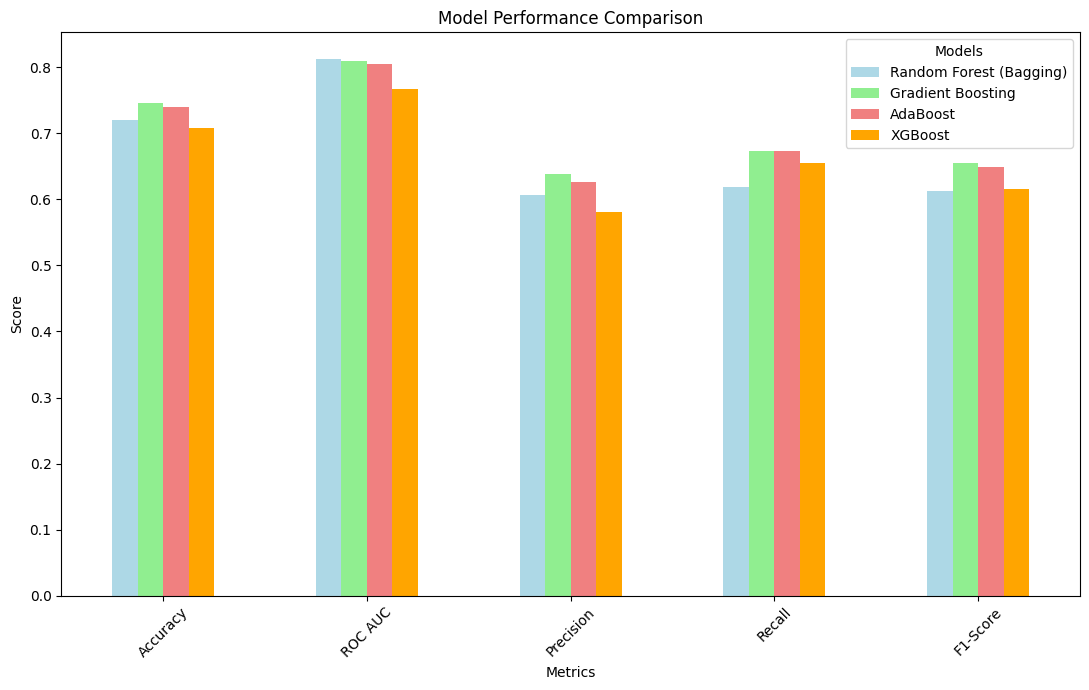

In [9]:
# Visualization 2: Bar plot for comparison of metrics
# Transpose the DataFrame so that metrics are on the x-axis and model names on the y-axis
comparison_table.T.plot(kind='bar', figsize=(11, 7), rot=45, color=['lightblue', 'lightgreen', 'lightcoral', 'orange'])

# Set title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend(title="Models", loc="upper right")

plt.tight_layout()
plt.show()

In [12]:
# Calculate and store the accuracy and ROC AUC for each model
bagging_accuracy = accuracy_score(y_test, bagging_pred)
boosting_accuracy = accuracy_score(y_test, boosting_pred)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
xgboost_accuracy = accuracy_score(y_test, xgboost_pred)

bagging_roc_auc = roc_auc_score(y_test, bagging_model.predict_proba(X_test_scaled)[:, 1])
boosting_roc_auc = roc_auc_score(y_test, boosting_model.predict_proba(X_test_scaled)[:, 1])
adaboost_roc_auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test_scaled)[:, 1])
xgboost_roc_auc = roc_auc_score(y_test, xgboost_model.predict_proba(X_test_scaled)[:, 1])

model_performance = {
    name: {'accuracy': accuracy, 'roc_auc': roc_auc}
    for name, accuracy, roc_auc in zip(
        ["Random Forest (Bagging)", "Gradient Boosting", "AdaBoost", "XGBoost"],
        [bagging_accuracy, boosting_accuracy, adaboost_accuracy, xgboost_accuracy],
        [bagging_roc_auc, boosting_roc_auc, adaboost_roc_auc, xgboost_roc_auc]
    )
}

# Find the best model based on ROC AUC score
best_model = max(model_performance, key=lambda model: model_performance[model]['roc_auc'])

# Print the best model details
print(f"The best model based on ROC AUC is: {best_model}")
print(f"ROC AUC Score: {model_performance[best_model]['roc_auc']:.4f}")
print(f"Accuracy: {model_performance[best_model]['accuracy']:.4f}")

The best model based on ROC AUC is: Random Forest (Bagging)
ROC AUC Score: 0.8125
Accuracy: 0.7208
